# Методы внутренней точки

## На прошлом занятии

- Метод Ньютона
- Квазиньютоновские методы

## Задача выпуклой оптимизации с ограничениями типа равенств

\begin{equation*}
\begin{split}
&\min f(x) \\ 
\text{s.t. } & Ax = b,
\end{split}
\end{equation*}
где $f$ - выпукла и дважды диференцируема, $A \in \mathbb{R}^{p \times n}$ и $\mathrm{rank} \; A = p < n$

### Двойственная задача
Двойственная функция 
\begin{equation*}
\begin{split}
g(\mu) &  = -b^{\top}\mu + \inf_x(f(x) + \mu^{\top}Ax) \\
& = -b^{\top}\mu - \sup_x((-A^{\top}\mu)^{\top}x -f(x)) \\
& = -b^{\top}\mu - f^*(-A^{\top}\mu)
\end{split}
\end{equation*}

Двойственная задача
$$
\max_\mu -b^{\top}\mu - f^*(-A^{\top}\mu)
$$

**Подход 1**: найти сопряжённую функцию и решить безусловную задачу оптимизации

**Трудности**
- не всегда легко восстановить решение прямой задачи по решению двойственной
- сопряжённая функция $f^*$ должна быть дважды дифференцируемое для быстрого решения двойственной задачи. Это не всегда так.

### Условия оптимальности

- $Ax^* = b$
- $f'(x^*) + A^{\top}\mu^* = 0$

или
$$
\begin{bmatrix}
f' & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
x^*\\
\mu^*
\end{bmatrix}
 = 
\begin{bmatrix}
0\\
b
\end{bmatrix}
$$

**Подход 2**: решить нелинейную в общем случае систему методом Ньютона.

**Вопрос**: в каком случае система окажется линейной?

## Метод Ньютона для выпуклых задач с ограничениями типа равенств

\begin{equation*}
\begin{split}
& \min_v f(x) + f'(x)^{\top}v + \frac{1}{2}v^{\top}f''(x)v\\
\text{s.t. } & A(x + v) = b
\end{split}
\end{equation*}

Из условий оптимальности имеем
$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
v\\
w
\end{bmatrix}
 = 
\begin{bmatrix}
-f'(x)\\
0
\end{bmatrix}
$$

**Шаг метода Ньютона определён только для невырожденной матрицы!**

**Упражнение**. Посчитайте за сколько итераций метод Ньютона сойдётся для квадратичной функции с ограничениями типа равенств.

### Линеаризация условий оптимальности

- $A(x + v) = b \rightarrow Av = 0$
- $f'(x + v) + A^{\top}w \approx f'(x) + f''(x)v + A^{\top}w = 0$

или

- $f''(x)v + A^{\top}w = -f'(x)$

### Псевдокод
**Важно:** начальная точка должна лежать в допустимом множестве!

```python
def NewtonEqualityFeasible(f, gradf, hessf, A, b, stop_crit, line_search, x0, tol):
    x = x0
    n = x.shape[0]
    while True:
        newton_matrix = [[hessf(x), A.T], [A, 0]]
        rhs = [-gradf(x), 0]
        w = solve_lin_sys(newton_matrix, rhs)
        h = w[:n]
        if stop_crit(x, h, gradf(x), **kwargs) < tol:
            break
        alpha = line_search(x, h, f, gradf(x), **kwargs)
        x = x + alpha * h
    return x
```

### Критерий остановки
Получим выражение для значения
$$
f(x) - \inf_v(\hat{f}(x + v) \; | \; A(x+v) = b),
$$
где $\hat{f}$ - квадратичная аппроксимация функции $f$.

Для этого 
$$
\langle h^{\top} \rvert \cdot \quad f''(x)h + A^{\top}w = -f'(x)
$$
с учётом $Ah = 0$ получаем 
$$
h^{\top}f''(x)h = -f'(x)^{\top}h
$$

Тогда 
$$
\inf_v(\hat{f}(x + v) \; | \; A(x+v) = b) = f(x) - \frac{1}{2}h^{\top}f''(x)h
$$

**Вывод:** величина $h^{\top}f''(x)h$ является наиболее адекватным критерием остановки метода Ньютона.

### Теорема сходимости

Сходимость метода аналогична сходимости метода Ньютона для задачи безусловной оптимизации.

**Теорема**
Пусть выполнены следующие условия
- множество уровней $S = \{ x \; | \; x \in D(f), \; f(x) \leq f(x_0), \; Ax = b \}$ замкнуто и $x_0 \in D(f), \; Ax_0 = b$
-  для любых $x \in S$ и $\tilde{x} \in S$ гессиан $f''(x)$ липшицев
- на множестве $S$ $\|f''(x)\|_2 \leq M $ и норма обратной матрицы KKT системы ограничена сверху

Тогда, метод Ньютона сходится к паре $(x^*, \mu^*)$ линейно, а при достижении достаточной близости к решению - квадратично.

## Случай недопустимой начальной точки

- Метод Ньютона требует чтобы начальная точка лежала в допустимом множестве
- Что делать, если поиск такой точки неочевиден: например, если область определения $f$ не сопадает с $\mathbb{R}^n$
- Пусть начальная точка не является допустимой, в этом случае условия KKT можно записать так

$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
v\\
w
\end{bmatrix}
 = -
\begin{bmatrix}
f'(x)\\
{\color{red}{Ax - b}}
\end{bmatrix}
$$
- Если $x$ допустима, то система совпадает с системой для обычного метода Ньютона

### Прямо-двойственная интерпретация

- Метод *прямо-двойственный*, если на каждой итерации обновляются прямые и двойственные переменные
- Покажем, что это значит. Для этого запишем условия оптимальности в виде
$$
r(x^*, \mu^*) = (r_p(x^*, \mu^*), r_d(x^*, \mu^*)) = 0,
$$
где $r_p(x, \mu) = Ax - b$ и $r_d(x, \mu) = f'(x) + A^{\top}\mu$
- Решим систему методом Ньютона:
$$
r(y + z) \approx r(y) + Dr(y)z = 0
$$

- Прямо-двойственный шаг в методе Ньютона определим как решение линейной системы
$$
Dr(y)z = -r(y)
$$
или более подробно
$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
z_p\\
z_d
\end{bmatrix}
 = -
\begin{bmatrix}
r_p(x, \mu)\\
r_d(x, \mu)
\end{bmatrix}
= - 
\begin{bmatrix}
f'(x) + A^{\top}\mu\\
Ax - b
\end{bmatrix}
$$

- Заменим $z_d^+ = \mu + z_d$ и получим
$$
\begin{bmatrix}
f''(x) & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
z_p\\
z_d^+
\end{bmatrix}
= - 
\begin{bmatrix}
f'(x)\\
Ax - b
\end{bmatrix}
$$

- Система полностью эквивалентна ранее полученной в обозначениях 

$$
v = z_p \qquad w = z_d^+ = \mu + z_d 
$$

- Метод Ньютона даёт шаг для прямой переменной и обновлённое значение для двойственной

### Способ инициализации

- Удобный способ задания начального приближения: найти точку из области определения $f$ гораздо проще, чем из пересечения области определения и допустимого множества
- Метод Ньютона с недопустимой начальной точкой не может определить согласованность ограничений

### Псевдокод

```python
def NewtonEqualityInfeasible(f, gradf, hessf, A, b, stop_crit, line_search, x0, mu0, tol):
    x = x0
    mu = mu0
    n = x.shape[0]
    while True:
        z_p, z_d = ComputeNewtonStep(hessf(x), A, b)
        if stop_crit(x, z_p, z_d, gradf(x), **kwargs) < tol:
            break
        alpha = line_search(x, z_p, z_d, f, gradf(x), **kwargs)
        x = x + alpha * z_p
        mu = mu + alpha * z_d
    return x
```

### Критерий остановки и линейный поиск

- Изменение $r_p$ после шага $z_p$
$$
A(x + \alpha z_p) - b = [A(x + z_p) = b] = Ax + \alpha(b - Ax) - b = (1 - \alpha)(Ax - b)
$$
- Итоговое изменение после $k$ шагов
$$
r^{(k)} = \prod_{i=0}^{k-1}(1 - \alpha^{(i)})r^{(0)}
$$
- Критерий остановки: $Ax = b$ и $\|r(x, \mu)\|_2 \leq \varepsilon$

- Линейный поиск: $c \in (0, 1/2)$, $\beta = (0, 1)$
```python
def linesearch(r, x, mu, z_p, z_d, c, beta):
    alpha = 1
    while np.linalg.norm(r(x + alpha * z_p, mu + alpha * z_d)) >= (1 - c * alpha) * np.linalg.norm(r(x, mu)):
        alpha *= beta
    return alpha
```

### Теорема сходимости

Результат аналогичен результаты для допустимой начальной точки

**Теорема.** Пусть
- множество подуровней $S = \{(x, \mu) \; | \; x \in D(f), \; \| r(x, \mu) \|_2 \leq \| r(x_0, \mu_0)  \|_2 \}$ замкнуто
- на множестве $S$ норма матрицы обратной к ККТ матрице ограничена
- гессиан липшицев на $S$.

Тогда сходимость метода линейна при удалении от решении и квадратичная при достаточном приближении к решению.

## Общая задача выпуклой оптимизации

\begin{equation*}
\begin{split}
& \min_{x \in \mathbb{R}^n} f_0(x)\\
\text{s.t. } & f_i (x) \leq 0 \qquad i=1,\ldots,m\\
& Ax = b,
\end{split}
\end{equation*}
где $f_i$ - выпуклые и дважды непрерывно дифференцируемы, $A \in \mathbb{R}^{p \times n}$ и $\mathrm{rank} \; A = p < n$. 

Предполагаем, что задача строго разрешима, то есть выполняется условие Слейтера.

## Условия оптимальности

- Разрешимость прямой задачи
$$
Ax^* = b, \; f_i(x^*) \leq 0, \; i = 1,\ldots,m
$$
- Разрешимость двойственной задачи
$$
\lambda^* \geq 0
$$
- Стационарность лагранжиана
$$
f'_0(x^*) + \sum_{i=1}^m \lambda^*_if'_i(x^*) + A^{\top}\mu^* = 0
$$
- Условие дополняющей нежёсткости
$$
\lambda^*_i f_i(x^*) = 0, \qquad i = 1,\ldots, m
$$

## Идея

- Свести задачу с ограничениями типа **неравенств** к последовательности задач с ограничениями типа **равенств**
- Использовать методы для решения задачи с ограничениями типа равенств

\begin{equation*}
\begin{split}
& \min f_0(x) + \sum_{i=1}^m I_-(f_i(x))\\
\text{s.t. } & Ax = b,
\end{split}
\end{equation*}
где $I_-$ - индикаторная функция
$$
I_-(u) = 
\begin{cases}
0, & u \leq 0\\
\infty, & u > 0
\end{cases}
$$

**Проблема.** Теперь целевая функция - **недифференцируема**.

## Логарифмический барьер

**Идея.** Приблизить функцию $I_-(u)$ функцией
$$
\hat{I}_-(u) = -t\log(-u),
$$
где $t > 0$ - параметр.

- Функции $I_-(u)$ и $\hat{I}_-(u)$ выпуклые и неубывающие
- Однако $\hat{I}_-(u)$ **дифференцируема** и приближается к $I_-(u)$ при $t \to 0$

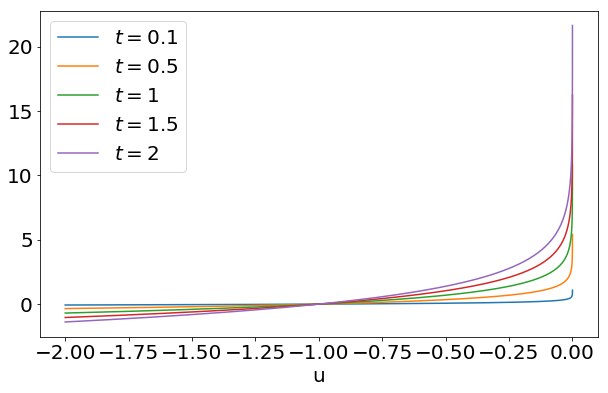

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 0, 100000, endpoint=False)
plt.figure(figsize=(10, 6))
for t in [0.1, 0.5, 1, 1.5, 2]:
    plt.plot(x, -t * np.log(-x), label=r"$t = " + str(t) + "$")
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("u", fontsize=20)

### "Ограниченная" задача

\begin{equation*}
\begin{split}
& \min f_0(x) + \sum_{i=1}^m -t \log(-f_i(x))\\
\text{s.t. } & Ax = b,
\end{split}
\end{equation*}
- Задача по-прежнему **выпуклая**
- Функция 
$$
\phi(x) = -\sum\limits_{i=1}^m \log(-f_i(x))
$$ 
называется *логарифмическим барьером*. Её область определения - множество точек, для котороых ограничения типа неравенств выполняются строго.

**Упражнение.** Найдите градиент и гессиан $\phi(x)$

## Центральный путь

Для каждого $t > 0$ "ограниченная" задача имеет единственное решение $x^*(t)$.

**Определение.** Последовательность $x^*(t)$ для $t > 0$ образует *центральный путь*.

## Условия оптимальности для "ограниченной" задачи

- Разрешимость прямой задачи
$$
Ax^*(t) = b, \; f_i(x^*) < 0, \; i = 1,\ldots,m
$$
- Стационарность лагранжиана
\begin{equation*}
\begin{split}
& f'_0(x^*(t)) + \phi'(x^*(t)) + A^{\top}\hat{\mu} = \\
& = f'_0(x^*(t)) - t\sum_{i=1}^m \frac{f_i'(x^*(t))}{f_i(x^*(t))} + A^{\top}\hat{\mu} = 0
\end{split}
\end{equation*}

- Обозначим 
$$
\lambda^*_i(t) = -\frac{t}{f_i(x^*(t))} \; i=1,\ldots,m \text{ и } \mu^* = \hat{\mu}
$$
- Тогда условие оптимальности можно записать как
$$
f'_0(x^*(t)) + \sum_{i=1}^m \lambda^*_i(t)f_i'(x^*(t)) + A^{\top}\mu^* = 0
$$
- Тогда $x^*(t)$ минимизирует лагранжиан 
$$
L = f_0(x) + \sum_{i=1}^m \lambda_if_i(x) + \mu^{\top}(Ax - b)
$$
для $\lambda = \lambda^*(t)$ и $\mu = \mu^*$.

### Зазор двойственности

- Двойственная функция $g(\lambda^*(t), \mu^*)$ конечна и представима в виде
\begin{equation*}
\begin{split}
g(\lambda^*(t), \mu^*) & = f_0(x^*(t)) + \sum_{i=1}^m \lambda^*_i(t)f_i(x^*(t)) + (\mu^*)^{\top}(Ax^*(t) - b)\\
& = f_0(x^*(t)) - mt
\end{split}
\end{equation*}

- Зазор двойственности
$$
f_0(x^*(t)) - p^* \leq mt
$$

- При $t \to 0$ зазор двойственности равен 0 и центральный путь сходится к решению исходной задачи.

## ККТ интерпретация

Условия оптимальности для "ограниченной" задачи эквивалентны условиям оптимальности для исходной задачи если
$$
-\lambda_i f_i(x) = 0 \Rightarrow - \lambda_i f_i(x) = t \quad i = 1,\ldots, m
$$

## Физическая интерпретация
- Предположим, что ограничений типа равенства нет
- Рассмотрим неквантовую частицу в поле сил
- Каждому ограничению $f_i(x) \leq 0$ поставим в соответствие силу
$$
F_i(x) = -\nabla(-\log(-f_i(x))) = \frac{f'_i(x)}{f_i(x)}
$$
- Целевой функции также поставим в соответствие силу 
$$
F_0(x) = -\frac{f'_0(x)}{t}
$$
- Каждая точка из центрального пути $x^*(t)$ - это положение частицы, в котором выполняется баланс сил ограничений и целевой функции
- С уменьшением $t$ сила для целевой функции доминирует, и частица стремится занять положение, расположенное ближе к оптимальному
- Поскольку сила ограничений стремится к бесконечности при приближении частицы к границе, частица никогда не вылетит из допустимого множества

## Барьерный метод

- $x_0$ должна быть допустимой
- $t_0 > 0$ - начальное значение параметра
- $\alpha \in (0, 1)$ - множитель для уменьшения $t_0$

```python
def BarrierMethod(f, x0, t0, tol, alpha, **kwargs):
    x = x0
    t = t0
    while True:
        x = SolveBarrierProblem(f, t, x, **kwargs)
        if m * t < tol:
            break
        t *= alpha
    return x
```

### Точность решения "ограниченной" задачи

- Точное решение "ограниченной" задачи не требуется, так как приближённый центральный путь всё равно сойдётся к решению исходной задачи
- Двойственные переменные перестают быть двойственными при неточном решении, но это поправимо введением поправочных слагаемых
- Разница в стоимости точного и неточного центрального пути - несколько итераций метода Ньютона, поэтому существенного ускорения добиться нельзя

### Выбор параметров
- Множитель $\alpha$
    - При $\alpha \sim 1$, **мало** итераций нужно для решения "ограниченной" задачи, но **много** для нахождения точного решения исходной задачи
    - При $\alpha \sim 10^{-5}$ **много** итераций нужно для решения "ограниченной" задачи, но **мало** для нахождения точного решения исходной задачи
- Начальный параметр $t_0$
    - Аналогичная альтернатива как и для параметра $\alpha$
    - Параметр $t_0$ задаёт начальную точку для центрального пути

### Почти теорема сходимости

- Как было показано выше при $t \to 0$ барьерный метод сходится к решению исходной задачи
- Скорость сходимости напрямую связана с параметрами $\alpha$ и $t_0$, как показано ранее
- Основная сложность - быстрое решение вспомогательных задач методом Ньютона

## Задача поиска допустимого начального приближения

- Барьерный метод требует допустимого начального приближения
- Метод разбивается на две фазы
    - Первая фаза метода ищет допустимое начальное приближение
    - Вторая фаза использует найденное начальное приближение для запуска барьерного метода

### Первая фаза метода

Простой поиск допустимой точки

\begin{equation*}
\begin{split}
& \min s\\
\text{s.t. } & f_i(x) \leq s\\
& Ax = b
\end{split}
\end{equation*}
- эта задача всегда имеет строго допустимое начальное приближение
- если $s^* < 0$, то $x^*$ строго допустима и может быть использована в барьерном методе
- если $s^* > 0$, то задача не разрешима и допустимое множество пусто

### Сумма несогласованностей
\begin{equation*}
\begin{split}
& \min s_1 + \ldots + s_m\\
\text{s.t. } & f_i(x) \leq s_i\\
& Ax = b\\
& s \geq 0
\end{split}
\end{equation*}
- оптимальное значене равно нулю и достигается тогда и только тогда когда система ограничений совместна
- если задача неразрешима, то можно определить какие ограничения к этому приводят, то есть какие $s_i > 0$ 

### Вторая фаза метода

- После получения допустимой начальной точки $x_0$ выполняется обычный метод Ньютона для задачи с ограничениями равенствами

## Прямо-двойственный метод

Похож на барьерный метод, но
- нет разделения на внешние итерации и внутренние: на каждой итерации обновляются прямые и двойственные переменные
- направление определяется методом Ньютона, применённого к модифицированной системе ККТ
- последовательность точек в прямо-двойственном методе не обязательно допустимы 
- работает даже когда задача не строго допустима

## Резюме

- Метод Ньютона для выпуклой задачи с оганичениями типа равенств
- Случай недопустимой начальной точки
- Прямой барьерный метод
- Прямо-двойственный метод